In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.tree import plot_tree
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

In [3]:
df = pd.read_csv('C2T1_data.csv')

In [4]:
##Pandas profiling issues 
#pandas_profiling.ProfileReport(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

In [6]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [7]:
df.notnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         X1    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...   X15  \
0     True  True  True  True  True  True  True  True  True  True  ...  True   
1     True  True  True  True  True  True  True  True  True  True  ...  True   
2     True  True  True  True  True  True  True  True  True  True  ...  True   
3     True  True  True  True  True  True  True  True  True  True  ...  True   
4     True  True  True  True  True  True  True  True  True  True  ...  True   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3665  True  True  True  True  True  True  True  True  True  True  ...  True   
3666  True  True  True  True  True  True  True  True  True  True  ...  True   
3667  True  True  True  True  True  True  True  True  True  True  ...  True   
3668  True  True  True  True  True  True  True  True  True  True  ...  True   
3669  True  True  True  True  True  True  True  True  True  True  ...

In [8]:
##Issues with data around 2397th row with manipulation - attempting to view this row of data to get a better understanding of issue
print(df.iloc[2395:2400 ]) 

             X1      X2           X3        X4   X5     X6     X7     X8  \
2395     130000  female   university         2   24      1     -2     -1   
2396     110000  female  high school         1   27      0      0      0   
2397     200000    male   university         1   29      0      0      0   
2398  LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
2399      20000  female   university         1   24      2      2     -1   

         X9    X10  ...        X15        X16        X17       X18       X19  \
2395     -1     -1  ...         -3        998        937         0      3372   
2396      0      0  ...      47316      47175      47141      2326      3000   
2397      2      2  ...      48367      49366      47539      2078      3900   
2398  PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
2399     -1     -2  ...          0          0          0         0       689   

           X20       X21       X22       X23                  

In [9]:
##Dropping row 2397 as that row was a duplicated header and caused issues with converting data from object to numeric values
df = df.drop(df.index[2397])

In [10]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [11]:
cols = ['X1', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

In [12]:
##Changing certain columns from objects to numeric values
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [13]:
##Dropping the first row as converting to numeric values turned header names to NaN
df = df.drop(df.index[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 1 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3667 non-null   float64
 1   X2      3668 non-null   object 
 2   X3      3668 non-null   object 
 3   X4      3667 non-null   float64
 4   X5      3667 non-null   float64
 5   X6      3667 non-null   float64
 6   X7      3667 non-null   float64
 7   X8      3667 non-null   float64
 8   X9      3667 non-null   float64
 9   X10     3667 non-null   float64
 10  X11     3667 non-null   float64
 11  X12     3667 non-null   float64
 12  X13     3667 non-null   float64
 13  X14     3667 non-null   float64
 14  X15     3667 non-null   float64
 15  X16     3667 non-null   float64
 16  X17     3667 non-null   float64
 17  X18     3667 non-null   float64
 18  X19     3667 non-null   float64
 19  X20     3667 non-null   float64
 20  X21     3667 non-null   float64
 21  X22     3667 non-null   float64
 22  

In [15]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,female,university,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000.0,female,university,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000.0,female,university,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000.0,female,university,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000.0,male,university,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [16]:
## Dropping duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2398
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2395 non-null   float64
 1   X2      2396 non-null   object 
 2   X3      2396 non-null   object 
 3   X4      2395 non-null   float64
 4   X5      2395 non-null   float64
 5   X6      2395 non-null   float64
 6   X7      2395 non-null   float64
 7   X8      2395 non-null   float64
 8   X9      2395 non-null   float64
 9   X10     2395 non-null   float64
 10  X11     2395 non-null   float64
 11  X12     2395 non-null   float64
 12  X13     2395 non-null   float64
 13  X14     2395 non-null   float64
 14  X15     2395 non-null   float64
 15  X16     2395 non-null   float64
 16  X17     2395 non-null   float64
 17  X18     2395 non-null   float64
 18  X19     2395 non-null   float64
 19  X20     2395 non-null   float64
 20  X21     2395 non-null   float64
 21  X22     2395 non-null   float64
 22  

In [17]:
##Converting Gender, Education, Default into string datatypes for further conversion
df = df.astype({"X2": str, "X3": str, "Y": str}, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2398
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2395 non-null   float64
 1   X2      2396 non-null   object 
 2   X3      2396 non-null   object 
 3   X4      2395 non-null   float64
 4   X5      2395 non-null   float64
 5   X6      2395 non-null   float64
 6   X7      2395 non-null   float64
 7   X8      2395 non-null   float64
 8   X9      2395 non-null   float64
 9   X10     2395 non-null   float64
 10  X11     2395 non-null   float64
 11  X12     2395 non-null   float64
 12  X13     2395 non-null   float64
 13  X14     2395 non-null   float64
 14  X15     2395 non-null   float64
 15  X16     2395 non-null   float64
 16  X17     2395 non-null   float64
 17  X18     2395 non-null   float64
 18  X19     2395 non-null   float64
 19  X20     2395 non-null   float64
 20  X21     2395 non-null   float64
 21  X22     2395 non-null   float64
 22  

In [18]:
##Mapping then converting gender into numerical values based on these mappings
gender_mapping = {
    'female':(2),
    'male':(1)}
df['X2'] = df['X2'].map(gender_mapping)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2.0,university,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000.0,2.0,university,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000.0,2.0,university,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000.0,2.0,university,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000.0,1.0,university,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [19]:
##Mapping then converting education into numerical values based on these mappings
edu_mapping = {
    'university':(2),
    'graduate school':(1),
    'high school':(3),
    'other':(4)}
df['X3'] = df['X3'].map(edu_mapping)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [20]:
##Mapping then converting education into numerical values based on these mappings
def_mapping = {
    'default':(1),
    'not default':(0)}
df['Y'] = df['Y'].map(def_mapping)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [21]:
##Converting Gender, Education, Default from string into integers
df = df.astype({"X2": int, "X3": int, "Y": int}, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2398
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2395 non-null   float64
 1   X2      2395 non-null   float64
 2   X3      2395 non-null   float64
 3   X4      2395 non-null   float64
 4   X5      2395 non-null   float64
 5   X6      2395 non-null   float64
 6   X7      2395 non-null   float64
 7   X8      2395 non-null   float64
 8   X9      2395 non-null   float64
 9   X10     2395 non-null   float64
 10  X11     2395 non-null   float64
 11  X12     2395 non-null   float64
 12  X13     2395 non-null   float64
 13  X14     2395 non-null   float64
 14  X15     2395 non-null   float64
 15  X16     2395 non-null   float64
 16  X17     2395 non-null   float64
 17  X18     2395 non-null   float64
 18  X19     2395 non-null   float64
 19  X20     2395 non-null   float64
 20  X21     2395 non-null   float64
 21  X22     2395 non-null   float64
 22  

In [22]:
##Renaming header column names
df.rename(columns={'X1': 'Limit_Balance', 
                   'X2': 'Sex', 
                   'X3': 'Education', 
                   'X4': 'Marriage', 
                   'X5': 'Age', 
                   'X6': 'Pay_1', 
                   'X7': 'Pay_2', 
                   'X8': 'Pay_3', 
                   'X9': 'Pay_4', 
                   'X10': 'Pay_5', 
                   'X11': 'Pay_6', 
                   'X12': 'Bill_1', 
                   'X13': 'Bill_2', 
                   'X14': 'Bill_3', 
                   'X15': 'Bill_4', 
                   'X16': 'Bill_5', 
                   'X17': 'Bill_6', 
                   'X18': 'PaidAmt_1', 
                   'X19': 'PaidAmt_2', 
                   'X20': 'PaidAmt_3', 
                   'X21': 'PaidAmt_4', 
                   'X22': 'PaidAmt_5', 
                   'X23': 'PaidAmt_6', 
                   'Y': 'Default', 
                  }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2398
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Limit_Balance  2395 non-null   float64
 1   Sex            2395 non-null   float64
 2   Education      2395 non-null   float64
 3   Marriage       2395 non-null   float64
 4   Age            2395 non-null   float64
 5   Pay_1          2395 non-null   float64
 6   Pay_2          2395 non-null   float64
 7   Pay_3          2395 non-null   float64
 8   Pay_4          2395 non-null   float64
 9   Pay_5          2395 non-null   float64
 10  Pay_6          2395 non-null   float64
 11  Bill_1         2395 non-null   float64
 12  Bill_2         2395 non-null   float64
 13  Bill_3         2395 non-null   float64
 14  Bill_4         2395 non-null   float64
 15  Bill_5         2395 non-null   float64
 16  Bill_6         2395 non-null   float64
 17  PaidAmt_1      2395 non-null   float64
 18  PaidAmt_

In [23]:
df.describe()

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,165820.459290,1.577871,1.799165,1.580376,35.422547,0.004593,-0.136534,-0.151983,-0.250104,-0.260543,...,41541.432568,39988.911482,38793.648434,5550.392067,5220.601670,4856.677662,4892.677244,4987.054280,5149.897704,0.216701
std,129518.842872,0.494002,0.730182,0.525569,9.453407,1.123708,1.208151,1.247668,1.175706,1.156042,...,68131.218297,64340.283064,65481.628056,13704.626418,14619.954972,22160.830015,14254.913886,16899.446512,20080.852096,0.412084
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1856.000000,1524.000000,1011.000000,995.000000,586.000000,247.500000,240.000000,251.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17918.000000,17581.000000,15810.000000,2120.000000,2000.000000,1443.000000,1500.000000,1500.000000,1327.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49309.000000,48473.000000,47319.000000,5003.500000,4923.500000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000,1.000000


(array([1.001e+03, 6.290e+02, 4.090e+02, 2.260e+02, 1.100e+02, 1.100e+01,
        8.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <BarContainer object of 10 artists>)

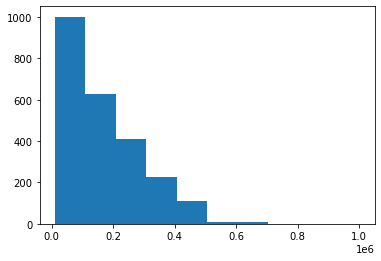

In [24]:
## Histogram of limit balance of customers
plt.hist(df['Limit_Balance'])

(array([432., 560., 546., 334., 214., 194.,  80.,  20.,   9.,   6.]),
 array([21. , 26.4, 31.8, 37.2, 42.6, 48. , 53.4, 58.8, 64.2, 69.6, 75. ]),
 <BarContainer object of 10 artists>)

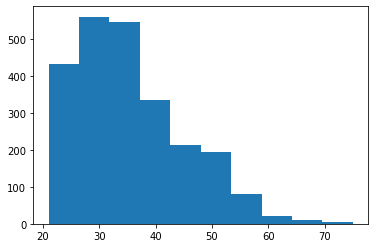

In [25]:
## histogram of ages of customers
plt.hist(df['Age'])

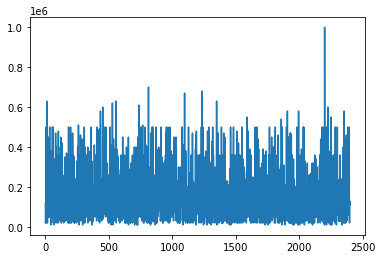

In [26]:
plt.plot(df['Limit_Balance'])

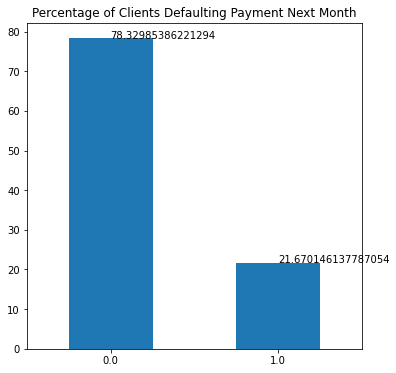

In [27]:
##Bar graph depicting percentage of clients who will default payment next month
## 77.7% are not expected to default, while the other 22.3% are expected to default
defaultcount = (df.Default.value_counts(normalize=True)*100)
defaultcount.plot.bar(figsize=(6,6))
plt.xticks(rotation=0)
plt.title('Percentage of Clients Defaulting Payment Next Month')
for x,y in zip([0,1], defaultcount):
    plt.text(x,y,y)
plt.show()

C:\Users\Public\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


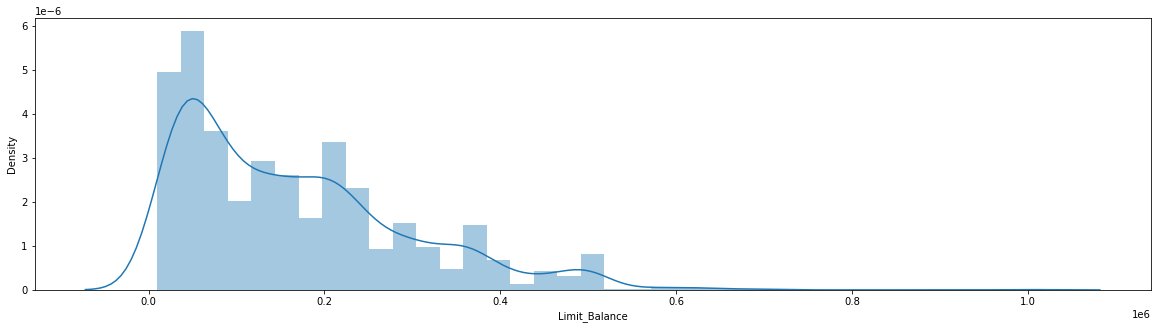

In [28]:
plt.subplots(figsize=(20,5))
sns.distplot(df.Limit_Balance)
plt.show()

In [29]:
## Limit balance distribution shows that most balances are usually less than 220k

C:\Users\Public\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


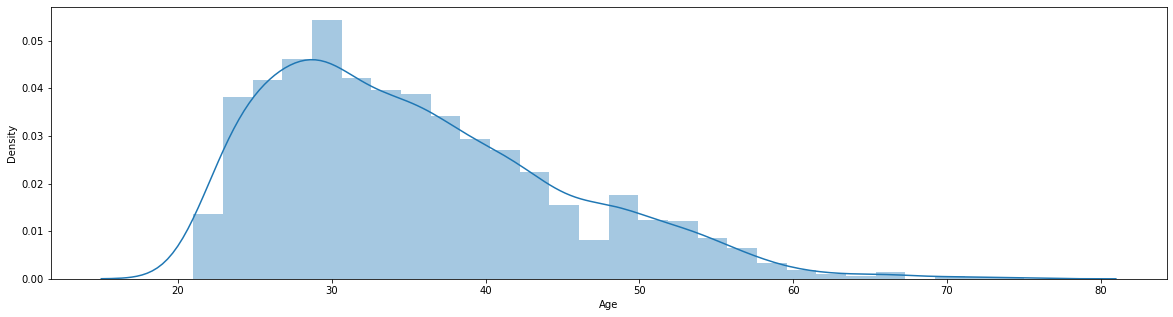

In [30]:
plt.subplots(figsize=(20,5))
sns.distplot(df.Age)
plt.show()

In [31]:
## Age distribution shows more clients between ages of 20-40 

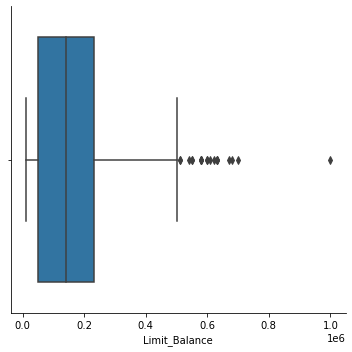

In [32]:
sns.catplot(x= 'Limit_Balance', kind = 'box', data= df)

In [33]:
## Most limit balances are less than 250k with outliers as high as a million dollars

In [34]:
## Creating bins for age ranges in decades
age_bins = [20,30,40,50,60,70,80]
age_names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['Age_Range'] = pd.cut(x=df.Age, bins=age_bins, labels=age_names, right=True)

In [35]:
## Creating counts of customers defaulting and not defaulting in these age range bins
age_count = df.Age_Range.value_counts()
age_nodef = (df.Age_Range[df['Default'] == 0].value_counts().sort_index())
age_def = (df.Age_Range[df['Default'] == 1].value_counts().sort_index())

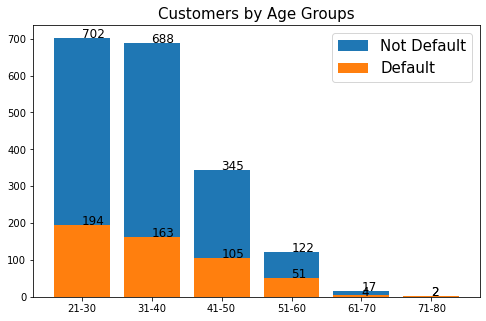

In [36]:
## Plotting counts of customers defaulting and not defaulting in these age range bins
plt.subplots(figsize=(8,5))
plt.bar(age_nodef.index, age_nodef.values, label='Not Default')
plt.bar(age_def.index, age_def.values, label='Default')
plt.legend(loc='upper right', fontsize=15)
plt.title("Customers by Age Groups", fontsize=15)
for x,y in zip(age_names,age_nodef):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(age_names,age_def):
    plt.text(x,y,y,fontsize=12)

In [37]:
### From graph above we see that customers defaulting the following month decreases with increasing age group. The largest age groups are 21-30 and 31-40

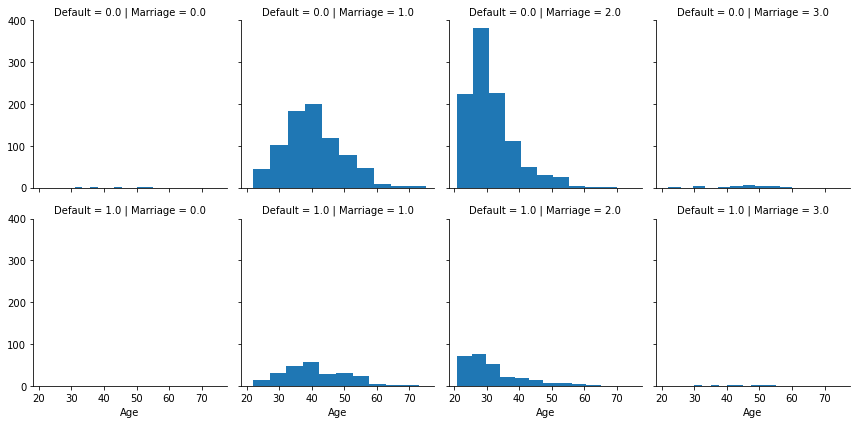

In [38]:
fig = sns.FacetGrid(df, row='Default', col='Marriage')
fig = fig.map(plt.hist, 'Age')
plt.show()

In [39]:
## Marital Status 1 (Married) and Marital Status 2 (Single)
## Default 1 (Default next month) and Default 0 (Not defaulting next month)
## From the above graph we see that single customers between 21-30 and married customers between 31-40 have the highest counts to default the next month.

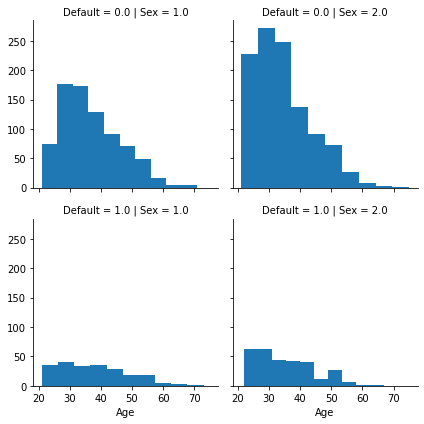

In [40]:
fig = sns.FacetGrid(df, row='Default', col='Sex')
fig = fig.map(plt.hist, 'Age')

In [41]:
## Sex of 1 (Male) and Sex of 2 (Female)
## Default 1 (Default next month) and Default 0 (Not defaulting next month)
## For both males and females, the age group of 21-30 had the highest defaulting counts
## Females had higher counts of not defaulting the next month

In [42]:
df.corr()

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
Limit_Balance,1.000000,0.013217,-0.224907,-0.147706,0.155066,-0.200542,-0.248250,-0.236212,-0.224726,-0.213831,...,0.375654,0.365768,0.356551,0.264061,0.269291,0.233700,0.194229,0.222675,0.208184,-0.084296
Sex,0.013217,1.000000,0.045112,-0.029346,-0.117603,-0.035635,-0.063715,-0.050595,-0.037294,-0.043453,...,-0.043416,-0.038804,-0.042475,0.014520,0.001946,0.002692,-0.009263,-0.036291,-0.020726,-0.005981
Education,-0.224907,0.045112,1.000000,-0.143503,0.200135,0.121778,0.154517,0.134295,0.123443,0.109202,...,-0.010171,-0.004926,-0.001448,-0.061734,-0.059784,-0.032949,-0.035346,-0.059758,-0.029134,0.043359
Marriage,-0.147706,-0.029346,-0.143503,1.000000,-0.420731,0.025898,0.037354,0.039021,0.047756,0.045481,...,-0.038116,-0.038933,-0.043240,-0.039100,-0.067803,-0.026571,-0.010283,-0.037061,-0.018374,-0.025488
Age,0.155066,-0.117603,0.200135,-0.420731,1.000000,-0.017838,-0.029874,-0.037759,-0.024049,-0.012091,...,0.058748,0.052151,0.064089,0.035777,0.071397,0.040456,-0.007333,0.026519,0.037730,0.039534
Pay_1,-0.200542,-0.035635,0.121778,0.025898,-0.017838,1.000000,0.637670,0.547807,0.497893,0.472957,...,0.174052,0.180883,0.176786,-0.104248,-0.117068,-0.031079,-0.061639,-0.042065,-0.066021,0.288314
Pay_2,-0.248250,-0.063715,0.154517,0.037354,-0.029874,0.637670,1.000000,0.763805,0.667610,0.639663,...,0.229719,0.233958,0.223566,-0.067878,-0.069399,-0.016353,-0.041610,-0.036861,-0.025573,0.202086
Pay_3,-0.236212,-0.050595,0.134295,0.039021,-0.037759,0.547807,0.763805,1.000000,0.812978,0.724634,...,0.221915,0.223241,0.217233,-0.003719,-0.091796,-0.018286,-0.049305,-0.032928,-0.027555,0.206262
Pay_4,-0.224726,-0.037294,0.123443,0.047756,-0.024049,0.497893,0.667610,0.812978,1.000000,0.835608,...,0.249561,0.254965,0.244480,-0.013865,0.007881,-0.044666,-0.026403,-0.022494,-0.009117,0.173127
Pay_5,-0.213831,-0.043453,0.109202,0.045481,-0.012091,0.472957,0.639663,0.724634,0.835608,1.000000,...,0.274580,0.280471,0.263188,-0.019413,0.016230,0.013635,-0.056145,-0.038348,-0.007586,0.187837


In [43]:
## From the continuous variables of age and limit balance, limit balance had the strongest correlation to default status
## From the variables of limit balance, sex, education, marriage, and age, the relationship order from least correlated to strongest correlated is Limit Balance > Education > Age > Sex > Marriage
## Between Repayment Status (Pay_#), Bill Amount (Bill_#), and Previous Payment (PaidAmt_#), Repayment Status had the strongest relationship

In [44]:
df.cov()

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
Limit_Balance,1.677513e+10,845.649266,-21269.991262,-10054.485553,189862.028069,-29187.144967,-38845.743447,-38170.991152,-34220.361272,-32016.722391,...,3.314875e+09,3.048045e+09,3.023947e+09,4.687104e+08,5.099184e+08,6.707768e+08,3.586018e+08,4.873913e+08,5.414555e+08,-4499.088710
Sex,8.456493e+02,0.244038,0.016272,-0.007619,-0.549208,-0.019781,-0.038027,-0.031184,-0.021661,-0.024816,...,-1.461262e+03,-1.233359e+03,-1.373976e+03,9.830425e+01,1.405609e+01,2.946997e+01,-6.522945e+01,-3.029712e+02,-2.056000e+02,-0.001218
Education,-2.126999e+04,0.016272,0.533166,-0.055071,1.381472,0.099920,0.136310,0.122346,0.105973,0.092180,...,-5.060046e+02,-2.314146e+02,-6.924983e+01,-6.177604e+02,-6.382124e+02,-5.331554e+02,-3.679049e+02,-7.373951e+02,-4.271768e+02,0.013047
Marriage,-1.005449e+04,-0.007619,-0.055071,0.276223,-2.090368,0.015295,0.023719,0.025588,0.029509,0.027633,...,-1.364843e+03,-1.316546e+03,-1.488107e+03,-2.816236e+02,-5.209868e+02,-3.094720e+02,-7.704276e+01,-3.291702e+02,-1.939197e+02,-0.005520
Age,1.898620e+05,-0.549208,1.381472,-2.090368,89.366910,-0.189494,-0.341198,-0.445360,-0.267291,-0.132135,...,3.783805e+04,3.171984e+04,3.967261e+04,4.635108e+03,9.867721e+03,8.475399e+03,-9.881831e+02,4.236659e+03,7.162456e+03,0.154009
Pay_1,-2.918714e+04,-0.019781,0.099920,0.015295,-0.189494,1.262719,0.865707,0.768033,0.657791,0.614397,...,1.332532e+04,1.307778e+04,1.300827e+04,-1.605412e+03,-1.923257e+03,-7.739471e+02,-9.873498e+02,-7.988194e+02,-1.489763e+03,0.133507
Pay_2,-3.884574e+04,-0.038027,0.136310,0.023719,-0.341198,0.865707,1.459630,1.151337,0.948294,0.893401,...,1.890883e+04,1.818620e+04,1.768667e+04,-1.123871e+03,-1.225802e+03,-4.378335e+02,-7.166109e+02,-7.526041e+02,-6.204192e+02,0.100610
Pay_3,-3.817099e+04,-0.031184,0.122346,0.025588,-0.445360,0.768033,1.151337,1.556674,1.192549,1.045181,...,1.886395e+04,1.792070e+04,1.774779e+04,-6.358366e+01,-1.674429e+03,-5.056096e+02,-8.769146e+02,-6.942770e+02,-6.903752e+02,0.106048
Pay_4,-3.422036e+04,-0.021661,0.105973,0.029509,-0.267291,0.657791,0.948294,1.192549,1.382284,1.135729,...,1.999038e+04,1.928692e+04,1.882185e+04,-2.233998e+02,1.354605e+02,-1.163766e+03,-4.424968e+02,-4.469213e+02,-2.152566e+02,0.083878
Pay_5,-3.201672e+04,-0.024816,0.092180,0.027633,-0.132135,0.614397,0.893401,1.045181,1.135729,1.336433,...,2.162665e+04,2.086142e+04,1.992322e+04,-3.075657e+02,2.743131e+02,3.493065e+02,-9.252270e+02,-7.491793e+02,-1.761144e+02,0.089483


In [45]:
education_count = df.Education.value_counts()
education_nodef = (df.Education[df['Default'] == 0].value_counts().sort_index())
education_def = (df.Education[df['Default'] == 1].value_counts().sort_index())

Text(0.5, 1.0, 'Customers Education')

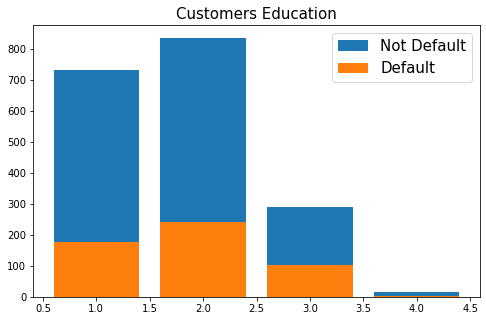

In [46]:
plt.subplots(figsize=(8,5))
plt.bar(education_nodef.index, education_nodef.values, label='Not Default')
plt.bar(education_def.index, education_def.values, label='Default')
plt.legend(loc='upper right', fontsize=15)
plt.title("Customers Education", fontsize=15)

In [47]:
## Education 1 = Graduate School, Education 2 = University, Education 3 = High School, Education 4 = Other
## University educated customers had the higher counts for defaulting followed by Graduate School educated customers

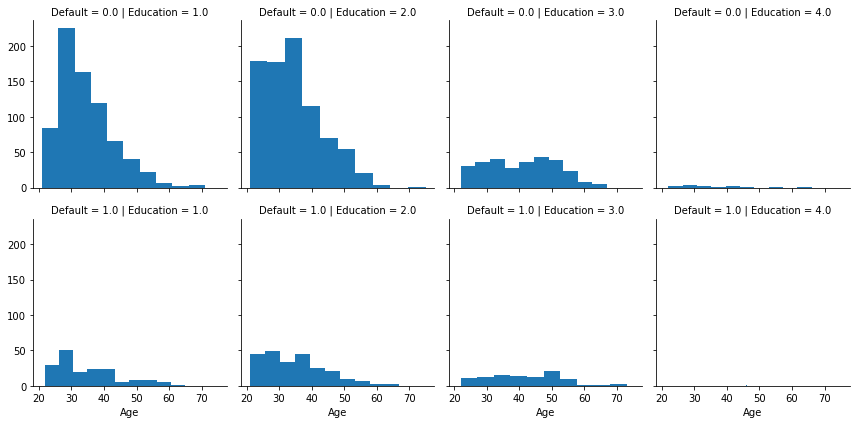

In [48]:
fig = sns.FacetGrid(df, row='Default', col='Education')
fig = fig.map(plt.hist, 'Age')

In [49]:
repay1_count = df.Pay_1.value_counts()
repay1_nodef = (df.Pay_1[df['Default'] == 0].value_counts().sort_index())
repay1_def = (df.Pay_1[df['Default'] == 1].value_counts().sort_index())

Text(0.5, 1.0, 'Customer Credit Behavior (Most Recent Month)')

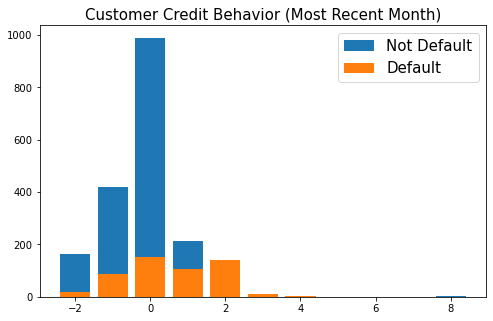

In [50]:
plt.subplots(figsize=(8,5))
plt.bar(repay1_nodef.index, repay1_nodef.values, label='Not Default')
plt.bar(repay1_def.index, repay1_def.values, label='Default')
plt.legend(loc='upper right', fontsize=15)
plt.title("Customer Credit Behavior (Most Recent Month)", fontsize=15)

In [51]:
## From the most recent repayment month status, most customers are using revolving credit
## Second largest grouping is fully paid
## Some customers who have not delayed payment (using revolving credit, paid in full, or no consumption), will still default

In [52]:
lb_bins = [0, 50000,100000,150000,200000, 250000,300000, 350000,400000, 450000,500000, 550000,600000, 650000,700000, 750000,800000, 850000,900000, 950000,1000000]
lb_names = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k','500k-550k', '550k-600k', '600k-650k', '650k-700k', '700k-750k', '750k-800k', '800k-850k', '850k-900k','900k-950k', '950k-1Mil']
df['Limit_Balance_Ranges'] = pd.cut(x=df.Limit_Balance, bins=lb_bins, labels=lb_names, right=True)
lb_count = df.Limit_Balance_Ranges.value_counts()
lb_nodef = (df.Limit_Balance_Ranges[df['Default'] == 0].value_counts().sort_index())
lb_def = (df.Limit_Balance_Ranges[df['Default'] == 1].value_counts().sort_index())

Text(0.5, 1.0, 'Limit Balances and Defaulting')

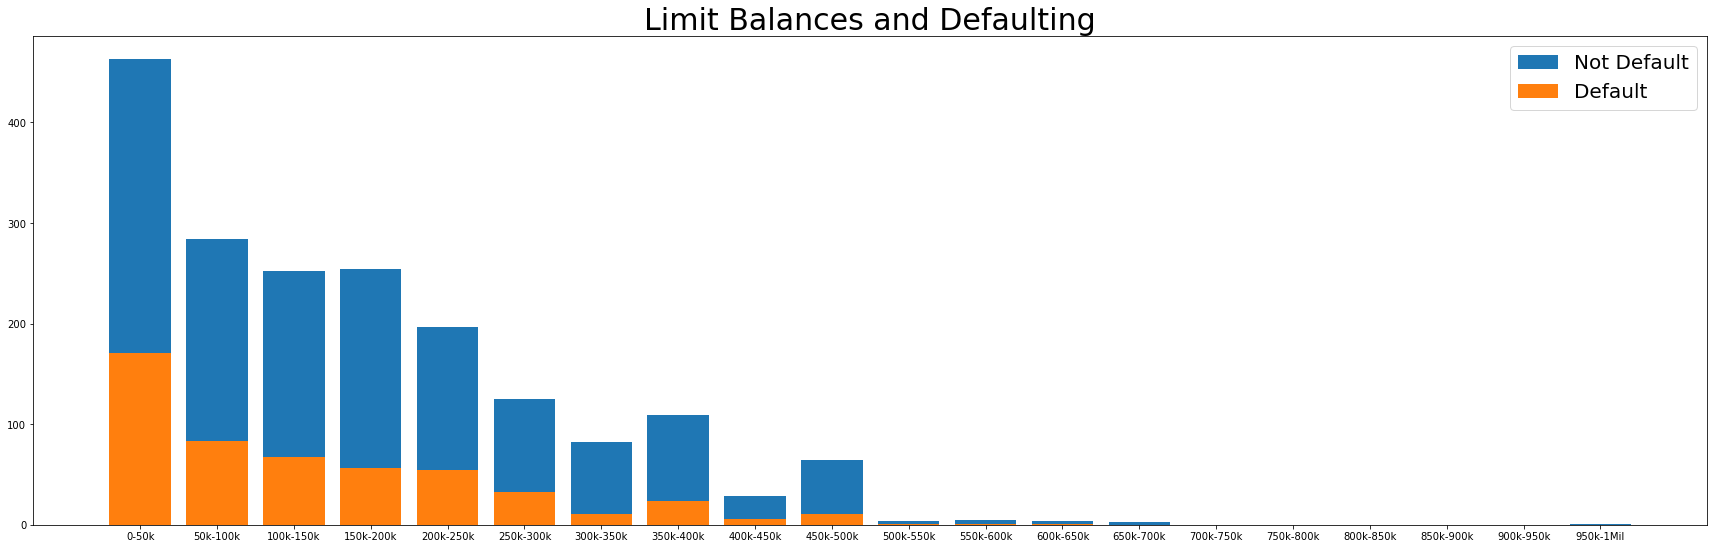

In [53]:
plt.subplots(figsize=(30,9))
plt.bar(lb_nodef.index, lb_nodef.values, label='Not Default')
plt.bar(lb_def.index, lb_def.values, label='Default')
plt.legend(loc='upper right', fontsize=20)
plt.title("Limit Balances and Defaulting", fontsize=30)

In [54]:
## From this we see that as limit balance increases defaulting is also decreasing
## 0-50k is the largest group in defaulting counts